<a href="https://colab.research.google.com/github/TejasKalluraya/StudentMarksPredictor-Using-Supervised-Machine-Learning-/blob/main/StudentMarksPredictor(_Using_Supervised_ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [4]:
#reading the data
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("The given dataset: ")
df.head(10) 

The given dataset: 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
#knowing the fundamental statistics of the given data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


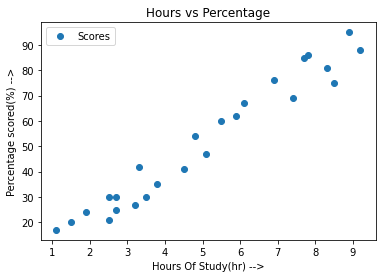

In [6]:
#visualizing the given dataset to identify patterns
df.plot(x = "Hours",y = "Scores", style = "o")
plt.title("Hours vs Percentage")
plt.xlabel("Hours Of Study(hr) -->")
plt.ylabel("Percentage scored(%) -->")
plt.show()

In [8]:
#checking whether data set is clean
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
#Splitting the dataset into dependent and independent
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

In [13]:
#Dividing the data values into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 0)

## Training The Algorithm


In [14]:
#Created an object of Linear Regression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

Training is completed

slope:  [9.78856669] 
Y-Intercept:  2.3708153823418883


<function matplotlib.pyplot.show>

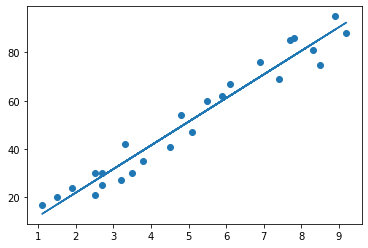

In [16]:
#Visualizing the Linear Regression Model
#finding slope and intercept first
m = lr.coef_
c = lr.intercept_
print("slope: ", m,"\nY-Intercept: ", c)
#Calculating Line Equation and plotting it
lineEq = m*X + c
plt.scatter(X,Y)
plt.plot(X,lineEq)
plt.show

## Making Predictions Using The Model Trained

In [20]:
ypred = lr.predict(x_test)
print("Hours Studied\n", x_test)
pred_data = pd.DataFrame({'Actual Score': y_test,'Predicted Score': ypred})
pred_data

Hours Studied
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


,Actual Score,Predicted Score
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


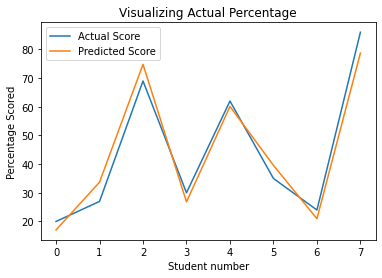

In [23]:
pred_data.plot(kind="line")
plt.title("Visualizing Actual Percentage")
plt.xlabel("Student number")
plt.ylabel("Percentage Scored")
plt.show()

In [27]:
#Finally let's predict the marks when a student studies 9.25hrs/day as asked in task
hrs = 9.25
prediction  = lr.predict([[hrs]])
print("If a student studies {} hours,".format(hrs),end="")
print(" he/she will get {} marks".format(prediction[0]))

If a student studies 9.25 hours, he/she will get 92.91505723477056 marks


# Analysing the accuracy of the algorithm

In [28]:
#accuracy is judged based on three important parameters
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,ypred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,ypred)))

Mean Absolute Error: 4.419727808027651
Mean Squared Error: 22.965097212700428
Root Mean Squared Error: 4.7921912746363144
